
#  Air Quality Data Discovery, Profiling & Preprocessing Project
 
It includes all major steps like Data Discovery, Profiling, Schema Alignment, Cleaning, Integration, Transformation, and Validation — along with visualizations.


In [1]:

#  Step 1: Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# To display plots inline
%matplotlib inline
sns.set(style="whitegrid")


In [3]:

# Basic dataset information
print("Dataset Info:")
print(df.info())

print("\nStatistical Summary:")
print(df.describe())

# Check missing values
print("\nMissing Values Count:")
missing_counts = df.isnull().sum()
print(missing_counts)

print("\nMissing Values Percentage:")
print((missing_counts / len(df)) * 100)


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None

Statistical Summary:
              PM2.5          PM10            NO           N

Mean Values of Numeric Columns:
PM2.5       67.450578
PM10       118.127103
NO          17.574730
NO2         28.560659
NOx         32.309123
NH3         23.483476
CO           2.248598
SO2         14.531977
O3          34.491430
Benzene      3.280840
Toluene      8.700972
Xylene       3.070128
AQI        166.463581
dtype: float64


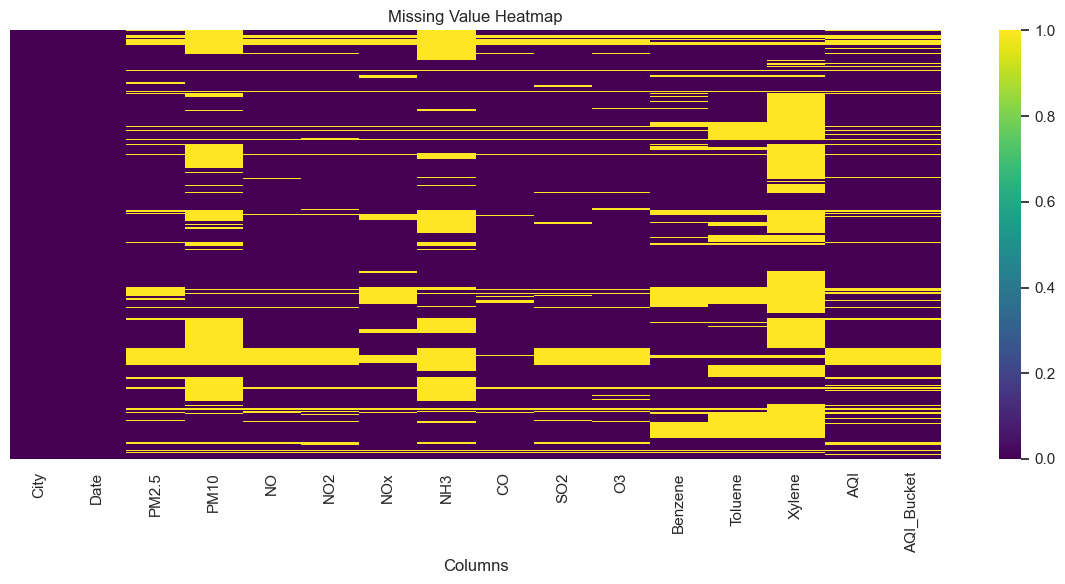

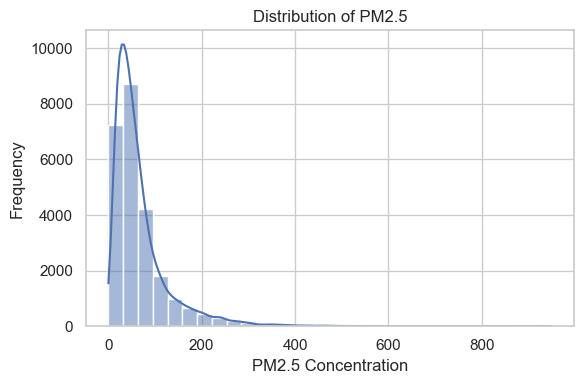

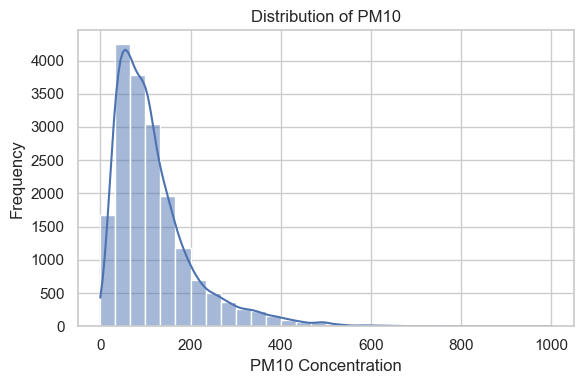

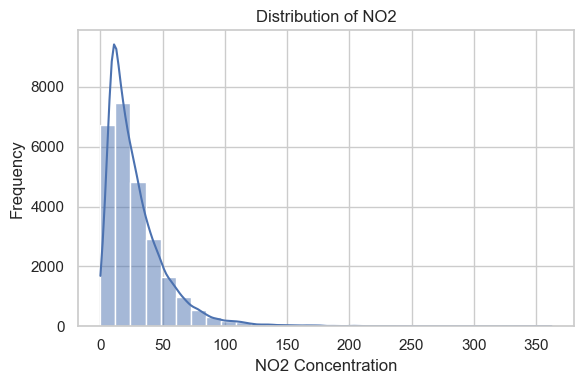

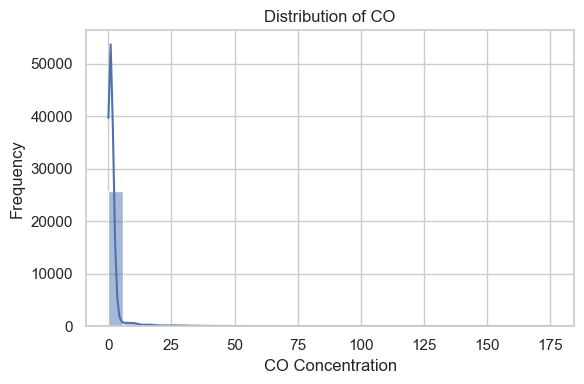

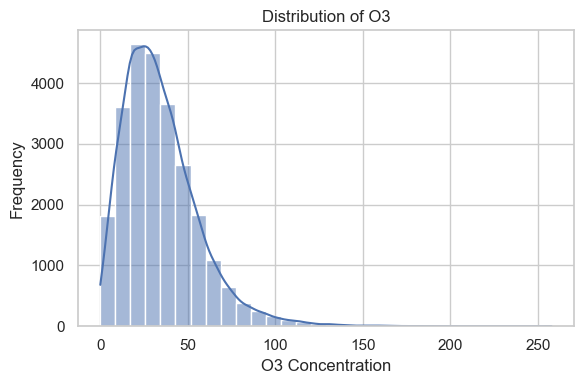

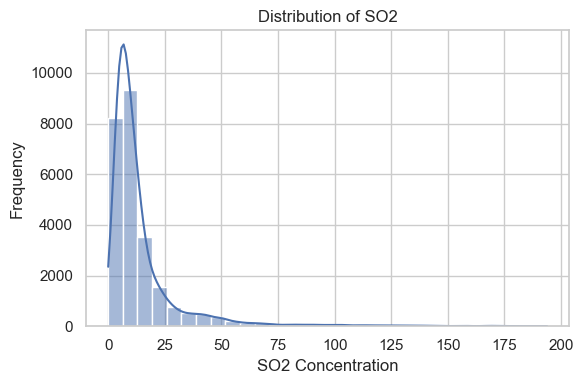

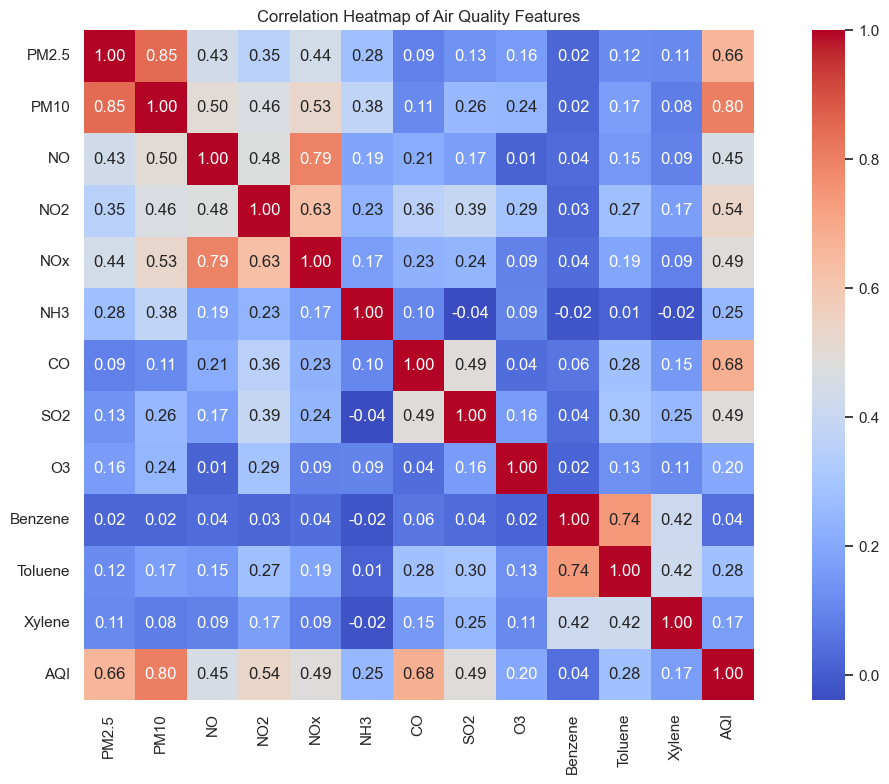

In [4]:

#  Step 3: Data Profiling (4 methods)

# Method 1: Pandas Statistical Profiling
print("Mean Values of Numeric Columns:")
print(df.select_dtypes(include=[np.number]).mean())

# Method 2: Missing Value Heatmap using Seaborn
plt.figure(figsize=(12,6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title("Missing Value Heatmap")
plt.xlabel("Columns")
plt.tight_layout()
plt.show()

# Method 3: Distribution Plot for major pollutants
pollutants = ['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2']
available_pollutants = [col for col in pollutants if col in df.columns]
for col in available_pollutants:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(f"{col} Concentration")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

# Method 4: Correlation Heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
if len(numeric_cols) > 0:
    plt.figure(figsize=(12,8))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", square=True)
    plt.title("Correlation Heatmap of Air Quality Features")
    plt.tight_layout()
    plt.show()


In [5]:

#  Step 4: Schema Alignment

# Clean column names (remove extra spaces, ensure proper format)
df.columns = [col.strip() for col in df.columns]

# Convert Date column to datetime
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Display column names and data types
print("Column Names:", df.columns.tolist())
print("\nData Types:")
print(df.dtypes)

df.head()


Column Names: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']

Data Types:
City                  object
Date          datetime64[ns]
PM2.5                float64
PM10                 float64
NO                   float64
NO2                  float64
NOx                  float64
NH3                  float64
CO                   float64
SO2                  float64
O3                   float64
Benzene              float64
Toluene              float64
Xylene               float64
AQI                  float64
AQI_Bucket            object
dtype: object


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [6]:

#  Step 5: Data Cleaning - Remove Missing Values

print("Before cleaning:")
print(f"Shape: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")



# Remove rows with any missing values
print("\nRemoving rows with missing values...")
rows_before = len(df)
df = df.dropna(axis=0)
rows_after = len(df)
print(f"Removed {rows_before - rows_after} rows with missing values")

# Verify cleaning
print("\nAfter cleaning:")
print(f"Shape: {df.shape}")
print(f"Total missing values: {df.isnull().sum().sum()}")
print("\nRemaining columns:", df.columns.tolist())


Before cleaning:
Shape: (29531, 16)
Total missing values: 88488

Removing rows with missing values...
Removed 23295 rows with missing values

After cleaning:
Shape: (6236, 16)
Total missing values: 0

Remaining columns: ['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket']


In [7]:

#  Step 6: Data Integration

# Set Date as index if available, otherwise use default index
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
    df.set_index('Date', inplace=True)
    print("Date column set as index")
else:
    print("Date column not found, using default index")

print(f"\nDataset shape: {df.shape}")
print(f"Index type: {type(df.index)}")
df.head(3)


Date column set as index

Dataset shape: (6236, 15)
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
Date,,,,,,,,,,,,,,,
2017-11-25,Amaravati,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2017-11-26,Amaravati,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
2017-11-27,Amaravati,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate


In [8]:
#  Step 7: Data Transformation

from sklearn.preprocessing import MinMaxScaler

# Select numeric pollutant columns (exclude City, AQI_Bucket if they exist)
exclude_cols = ['City', 'AQI_Bucket'] if 'City' in df.columns or 'AQI_Bucket' in df.columns else []
numeric_cols = [col for col in df.select_dtypes(include=[np.number]).columns if col not in exclude_cols]

# If AQI exists, we might want to exclude it from scaling as it's already an index
if 'AQI' in numeric_cols:
    numeric_cols.remove('AQI')

print(f"Columns to scale: {numeric_cols}")

if len(numeric_cols) > 0:
    # Ensure all columns are numeric
    for col in numeric_cols:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Scale values using MinMaxScaler
    scaler = MinMaxScaler()
    df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
    
    print(" Transformation complete — data normalized successfully.")
    print(f"\nScaled columns summary:")
    print(df[numeric_cols].describe())
else:
    print(" No numeric columns found for scaling.")


Columns to scale: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
 Transformation complete — data normalized successfully.

Scaled columns summary:
             PM2.5         PM10           NO          NO2          NOx  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean      0.093108     0.146523     0.105461     0.225273     0.144154   
std       0.084291     0.108723     0.126048     0.134172     0.122312   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.040690     0.074986     0.030383     0.112911     0.064208   
50%       0.071392     0.120660     0.061710     0.205214     0.107695   
75%       0.112121     0.181186     0.120416     0.310446     0.176190   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

               NH3           CO          SO2           O3      Benzene  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236

In [9]:

#  Step 8: Data Validation

print("=" * 50)
print("DATA VALIDATION REPORT")
print("=" * 50)

print(f"\nDataset Shape: {df.shape}")
print(f"Remaining Missing Values: {df.isnull().sum().sum()}")

print("\nData Types:")
print(df.dtypes)

print("\nStatistical Summary After Cleaning:")
print(df.describe())

# Check for any remaining issues
print("\nColumn Information:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}, Non-null count: {df[col].notna().sum()}")


DATA VALIDATION REPORT

Dataset Shape: (6236, 15)
Remaining Missing Values: 0

Data Types:
City           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

Statistical Summary After Cleaning:
             PM2.5         PM10           NO          NO2          NOx  \
count  6236.000000  6236.000000  6236.000000  6236.000000  6236.000000   
mean      0.093108     0.146523     0.105461     0.225273     0.144154   
std       0.084291     0.108723     0.126048     0.134172     0.122312   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.040690     0.074986     0.030383     0.112911     0.064208   
50%       0.071392     0.120660     0.061710     0.205214     0.107695   
75%       

Visualizing pollutants: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']


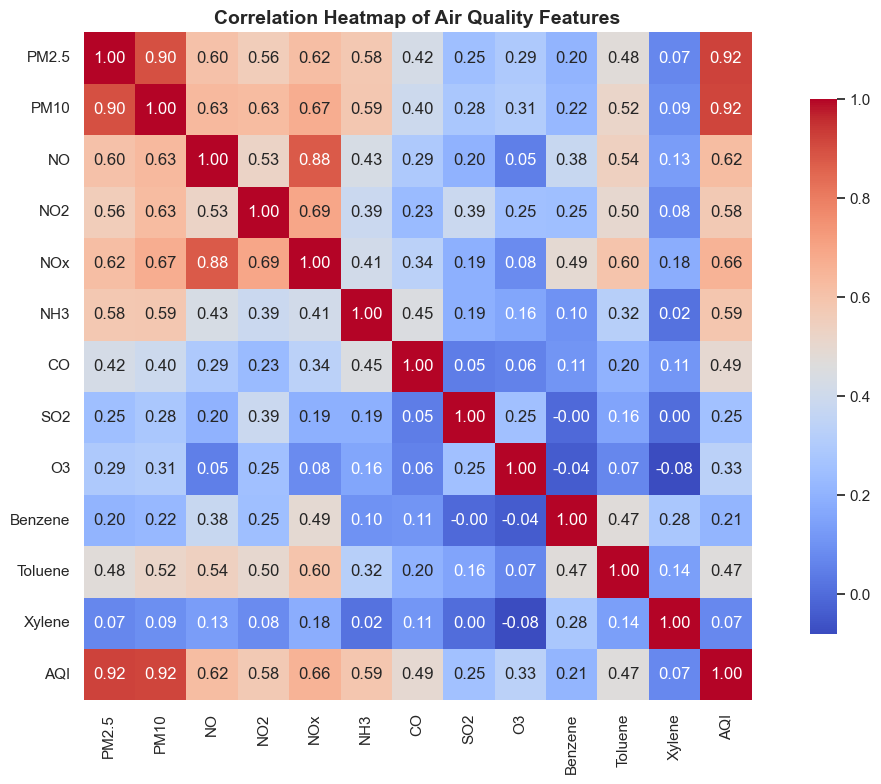

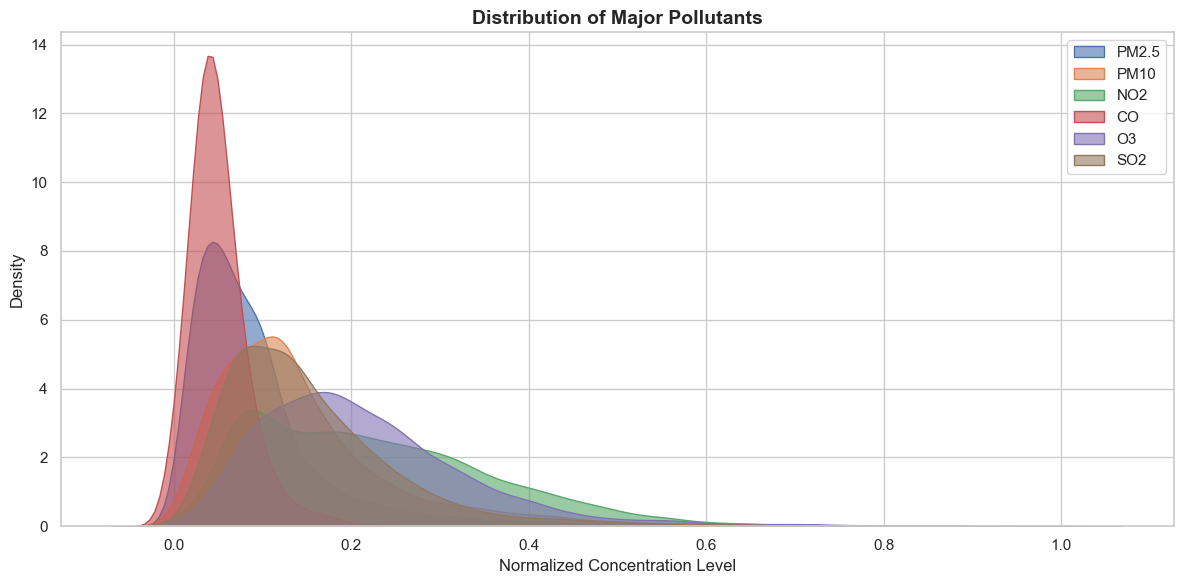

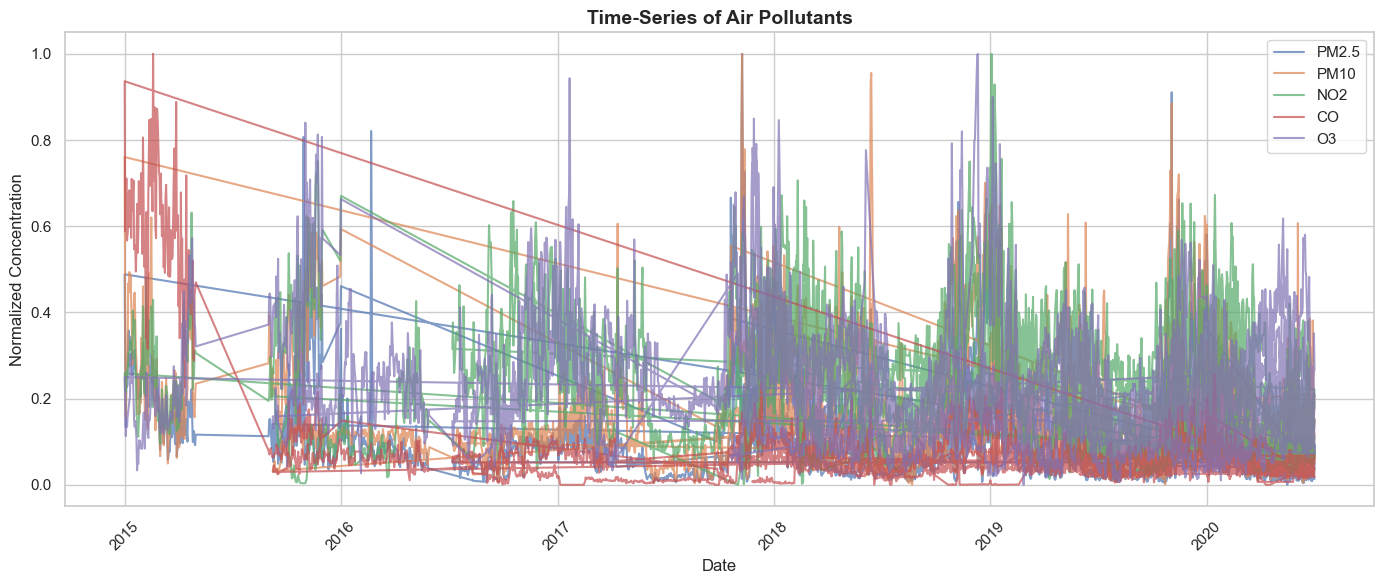

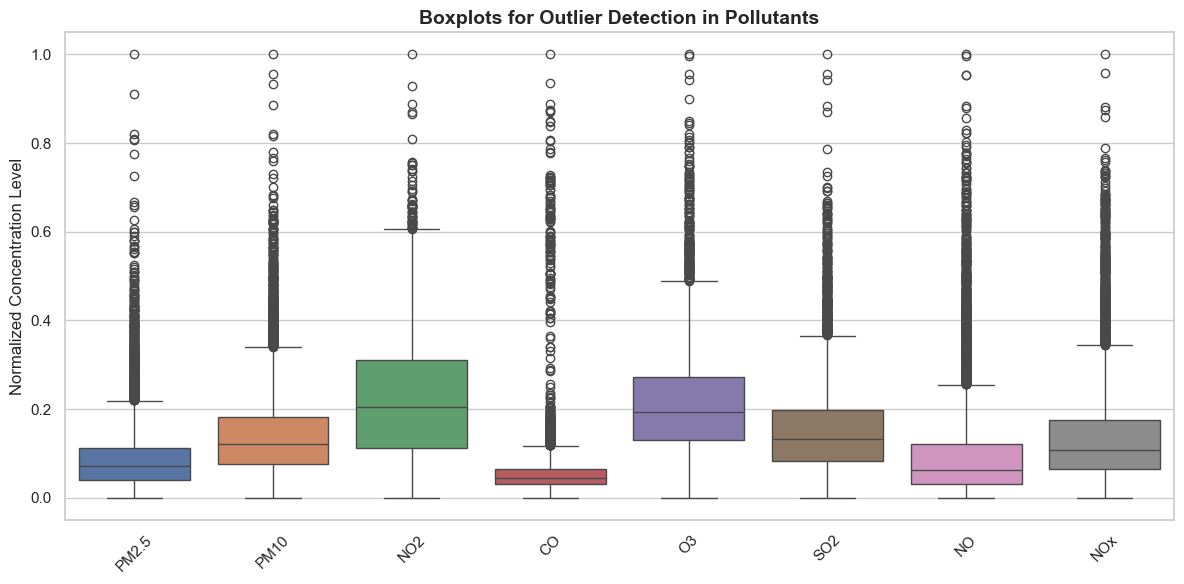

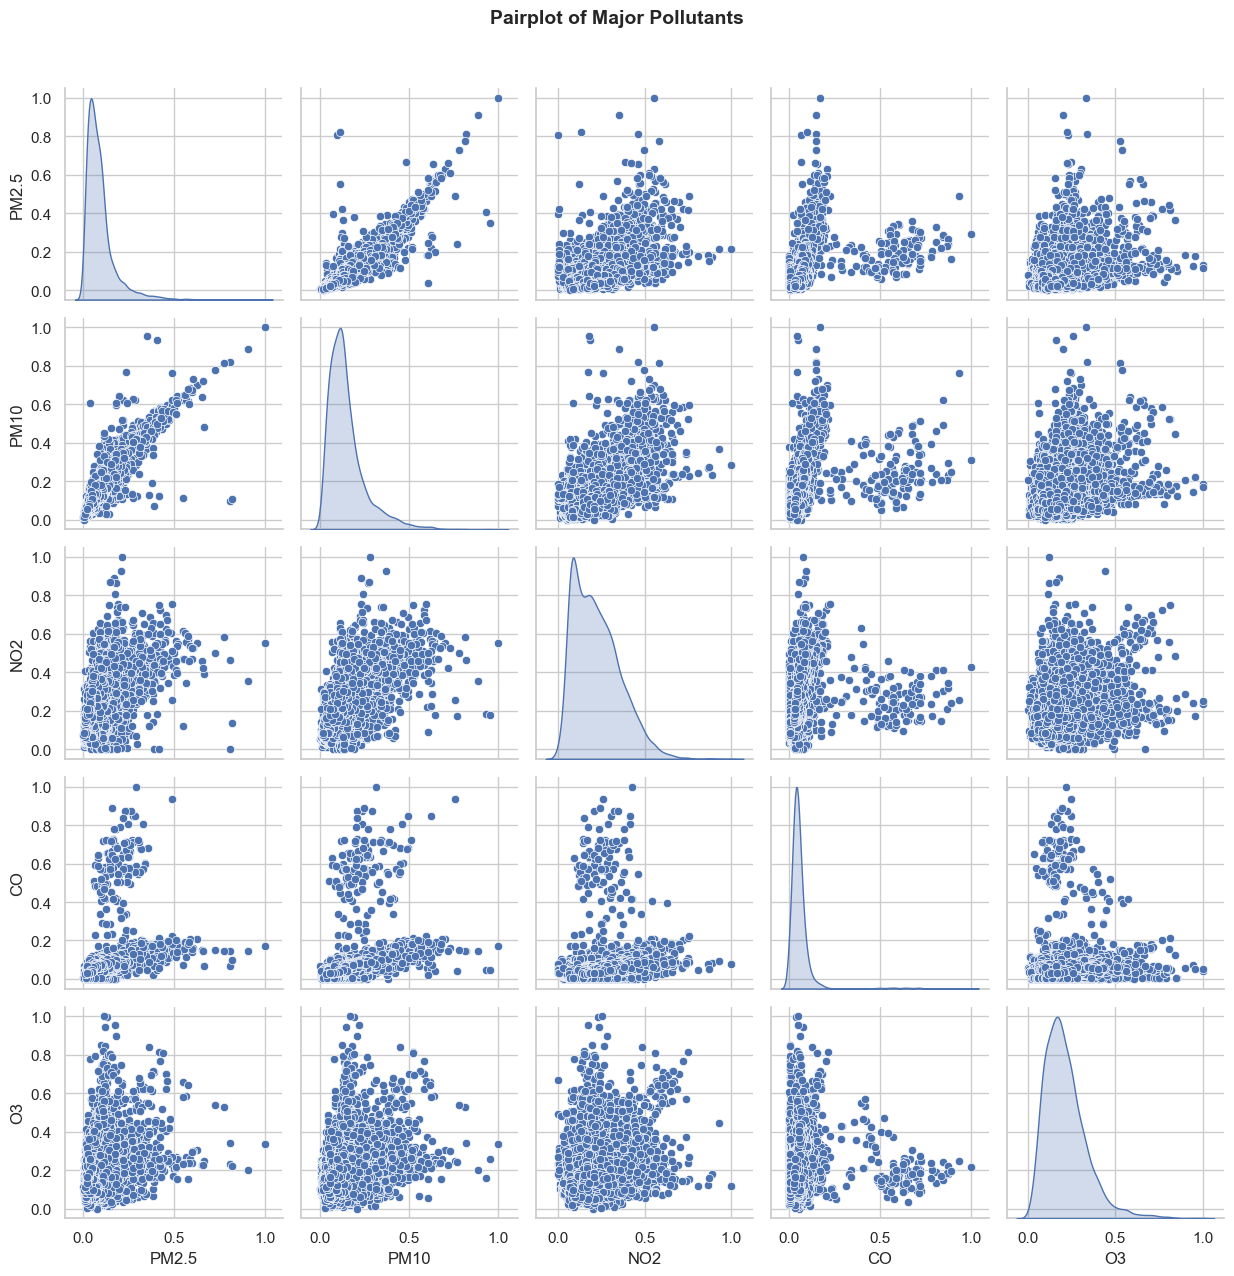

In [10]:

#  Step 9: Data Visualization (Seaborn + Matplotlib)

# Get numeric pollutant columns (exclude City, AQI_Bucket)
exclude_cols = ['City', 'AQI_Bucket'] if 'City' in df.columns or 'AQI_Bucket' in df.columns else []
pollutants = [col for col in df.select_dtypes(include=[np.number]).columns if col not in exclude_cols]

# If AQI exists, include it separately
if 'AQI' in df.columns and 'AQI' not in pollutants:
    pollutants.append('AQI')

print(f"Visualizing pollutants: {pollutants}")

# 1️ Correlation Heatmap
if len(pollutants) > 1:
    plt.figure(figsize=(12,8))
    correlation_matrix = df[pollutants].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, 
                cbar_kws={"shrink": 0.8})
    plt.title("Correlation Heatmap of Air Quality Features", fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()

# 2️ Distribution Plot for Major Pollutants
major_pollutants = [col for col in ['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2', 'NO', 'NOx'] if col in pollutants]
if len(major_pollutants) > 0:
    plt.figure(figsize=(12,6))
    for col in major_pollutants[:6]:  # Limit to 6 for readability
        sns.kdeplot(df[col], label=col, fill=True, alpha=0.6)
    plt.title("Distribution of Major Pollutants", fontsize=14, fontweight='bold')
    plt.xlabel("Normalized Concentration Level", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()
    plt.tight_layout()
    plt.show()

# 3️ Time-Series Plot (if Date index exists)
if isinstance(df.index, pd.DatetimeIndex) and len(major_pollutants) > 0:
    plt.figure(figsize=(14,6))
    for col in major_pollutants[:5]:  # Limit to 5 for readability
        plt.plot(df.index, df[col], label=col, alpha=0.7, linewidth=1.5)
    plt.title("Time-Series of Air Pollutants", fontsize=14, fontweight='bold')
    plt.xlabel("Date", fontsize=12)
    plt.ylabel("Normalized Concentration", fontsize=12)
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 4️ Boxplots for Outliers
if len(major_pollutants) > 0:
    plt.figure(figsize=(12,6))
    sns.boxplot(data=df[major_pollutants[:8]])  # Limit to 8 columns
    plt.title("Boxplots for Outlier Detection in Pollutants", fontsize=14, fontweight='bold')
    plt.ylabel("Normalized Concentration Level", fontsize=12)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# 5️ Pairplot (for first 5 pollutants to avoid overcrowding)
if len(major_pollutants) >= 2:
    pairplot_cols = major_pollutants[:5]
    sns.pairplot(df[pairplot_cols], diag_kind='kde')
    plt.suptitle("Pairplot of Major Pollutants", y=1.02, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()


In [11]:
# Feature Engineering
# Calculate composite Air Quality Index if AQI column doesn't exist
# Otherwise, use existing AQI for analysis

if 'AQI' not in df.columns:
    # Calculate AQI from available pollutants
    pollutant_cols = [col for col in ['PM2.5', 'PM10', 'NO2', 'CO', 'O3', 'SO2'] if col in df.columns]
    if len(pollutant_cols) > 0:
        df['AQI_Calculated'] = df[pollutant_cols].mean(axis=1)
        print(f"Created AQI_Calculated from: {pollutant_cols}")
    else:
        print("No standard pollutant columns found for AQI calculation")
else:
    print("AQI column already exists in dataset")
    
# Display AQI statistics if available
aqi_col = 'AQI' if 'AQI' in df.columns else 'AQI_Calculated' if 'AQI_Calculated' in df.columns else None
if aqi_col:
    print(f"\n{aqi_col} Statistics:")
    print(df[aqi_col].describe())

AQI column already exists in dataset

AQI Statistics:
count    6236.000000
mean      140.510103
std        92.738826
min        23.000000
25%        78.000000
50%       112.000000
75%       166.000000
max       677.000000
Name: AQI, dtype: float64


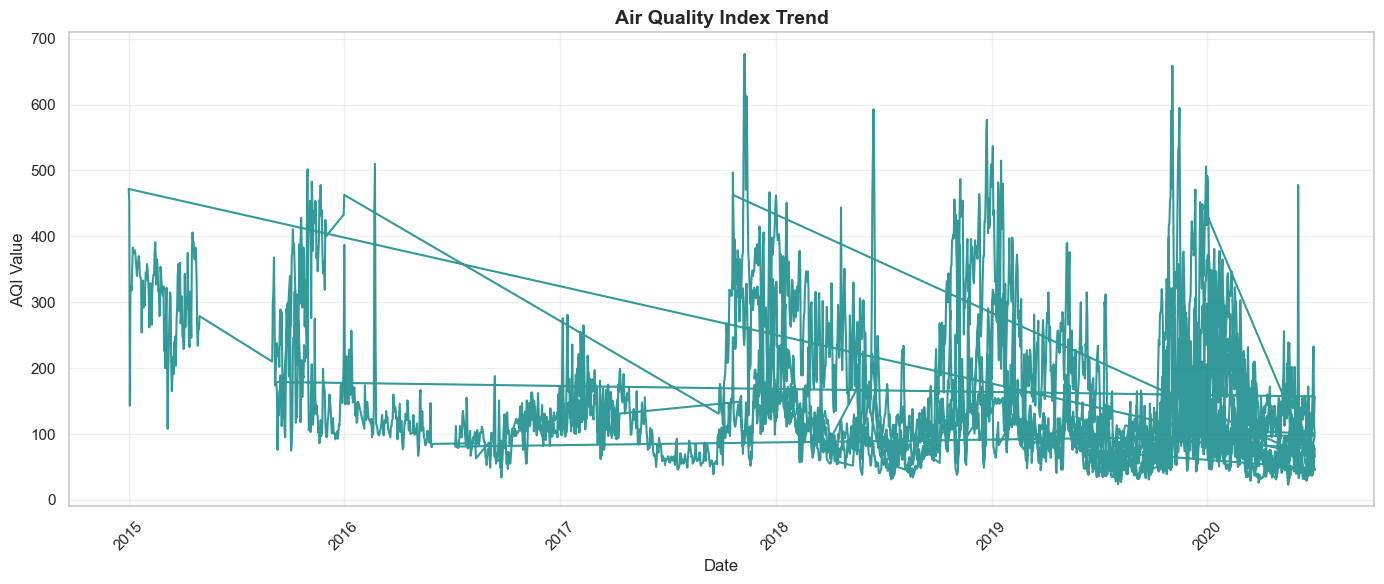

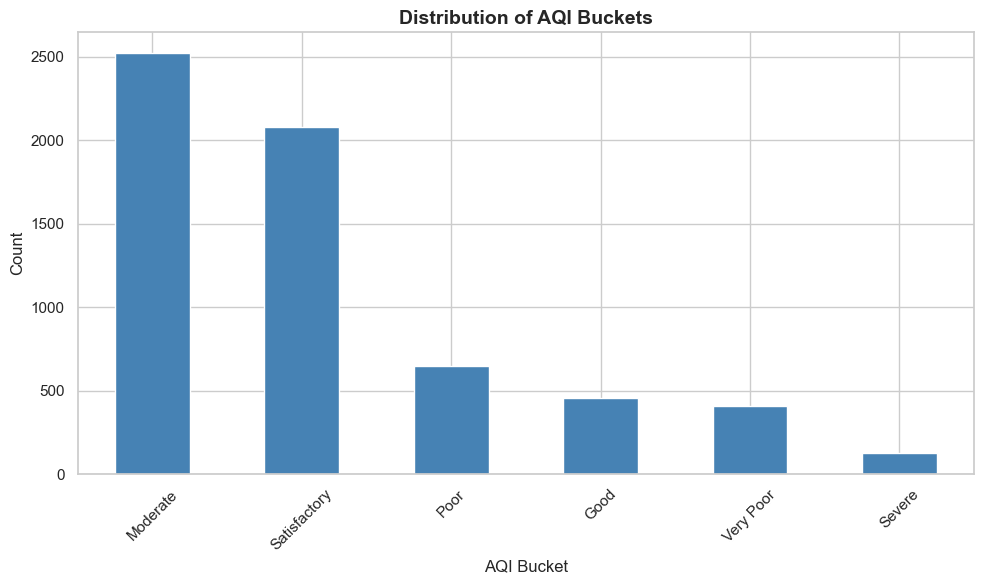

In [12]:
# Visualize AQI Trend
aqi_col = 'AQI' if 'AQI' in df.columns else 'AQI_Calculated' if 'AQI_Calculated' in df.columns else None

if aqi_col:
    plt.figure(figsize=(14,6))
    if isinstance(df.index, pd.DatetimeIndex):
        plt.plot(df.index, df[aqi_col], color='teal', linewidth=1.5, alpha=0.8)
        plt.xlabel('Date', fontsize=12)
        plt.xticks(rotation=45)
    else:
        plt.plot(df[aqi_col], color='teal', linewidth=1.5, alpha=0.8)
        plt.xlabel('Record Index', fontsize=12)
    
    plt.title('Air Quality Index Trend', fontsize=14, fontweight='bold')
    plt.ylabel('AQI Value', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    # If AQI_Bucket exists, show distribution
    if 'AQI_Bucket' in df.columns:
        plt.figure(figsize=(10,6))
        df['AQI_Bucket'].value_counts().plot(kind='bar', color='steelblue')
        plt.title('Distribution of AQI Buckets', fontsize=14, fontweight='bold')
        plt.xlabel('AQI Bucket', fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
else:
    print("No AQI column available for visualization")

In [13]:
# Train a simple regression model to predict AQI or a key pollutant
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Select features and target
# Try to predict AQI if it exists, otherwise predict a major pollutant
if 'AQI' in df.columns:
    target = 'AQI'
    # Use other pollutants as features (exclude AQI_Bucket and City)
    feature_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                    if col not in ['AQI', 'AQI_Bucket'] and col != 'City']
else:
    # Predict PM2.5 or another major pollutant
    target = 'PM2.5' if 'PM2.5' in df.columns else 'NO2' if 'NO2' in df.columns else None
    if target:
        feature_cols = [col for col in df.select_dtypes(include=[np.number]).columns 
                        if col != target and col not in ['AQI_Bucket', 'City']]
    else:
        feature_cols = []

if target and len(feature_cols) > 0:
    print(f"Predicting: {target}")
    print(f"Using features: {feature_cols[:5]}...")  # Show first 5 features
    
    X = df[feature_cols]
    y = df[target]
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Evaluate
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"\nModel Performance:")
    print(f"Training R² Score: {train_score:.4f}")
    print(f"Test R² Score: {test_score:.4f}")
    print(f"Test RMSE: {rmse:.4f}")
    
    # Feature importance (coefficients)
    feature_importance = pd.DataFrame({
        'Feature': feature_cols,
        'Coefficient': model.coef_
    }).sort_values('Coefficient', key=abs, ascending=False)
    
    print(f"\nTop 5 Most Important Features:")
    print(feature_importance.head())
else:
    print("Insufficient data for modeling. Need numeric features and target variable.")

Predicting: AQI
Using features: ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx']...

Model Performance:
Training R² Score: 0.9093
Test R² Score: 0.9217
Test RMSE: 25.5217

Top 5 Most Important Features:
  Feature  Coefficient
0   PM2.5   506.818533
1    PM10   344.910759
6      CO   127.168044
4     NOx    81.431810
8      O3    51.429575


### Linear Regression from Scratch

Implementing Linear Regression using mathematical formulas and gradient descent.

In [14]:
# Linear Regression from Scratch using Gradient Descent
import numpy as np

class LinearRegressionScratch:
    """
    Linear Regression implemented from scratch using:
    1. Normal Equation: θ = (X^T X)^-1 X^T y
    2. Gradient Descent for comparison
    """
    
    def __init__(self, learning_rate=0.01, n_iterations=1000, method='normal_equation'):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.method = method
        self.weights = None
        self.bias = None
        self.cost_history = []
    
    def fit(self, X, y):
        """Train the model"""
        n_samples, n_features = X.shape
        
        if self.method == 'normal_equation':
            # Normal Equation: θ = (X^T X)^-1 X^T y
            # Add bias term (column of ones)
            X_b = np.c_[np.ones((n_samples, 1)), X]
            
            # Calculate theta using normal equation
            theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
            
            self.bias = theta[0]
            self.weights = theta[1:]
            
            print("Method: Normal Equation (Closed-form solution)")
            print(f"Formula: θ = (X^T X)^-1 X^T y")
            
        else:  # gradient_descent
            # Initialize parameters
            self.weights = np.zeros(n_features)
            self.bias = 0
            
            print("Method: Gradient Descent")
            print(f"Learning Rate: {self.learning_rate}, Iterations: {self.n_iterations}")
            
            # Gradient Descent
            for i in range(self.n_iterations):
                # Predictions
                y_pred = self.predict(X)
                
                # Calculate gradients
                dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
                db = (1 / n_samples) * np.sum(y_pred - y)
                
                # Update parameters
                self.weights -= self.learning_rate * dw
                self.bias -= self.learning_rate * db
                
                # Calculate cost (MSE)
                cost = np.mean((y_pred - y) ** 2)
                self.cost_history.append(cost)
                
                if i % 100 == 0:
                    print(f"Iteration {i}: Cost = {cost:.6f}")
    
    def predict(self, X):
        """Make predictions"""
        return np.dot(X, self.weights) + self.bias
    
    def score(self, X, y):
        """Calculate R² score"""
        y_pred = self.predict(X)
        ss_total = np.sum((y - np.mean(y)) ** 2)
        ss_residual = np.sum((y - y_pred) ** 2)
        r2 = 1 - (ss_residual / ss_total)
        return r2
    
    def rmse(self, X, y):
        """Calculate RMSE"""
        y_pred = self.predict(X)
        mse = np.mean((y - y_pred) ** 2)
        return np.sqrt(mse)


# Train Linear Regression from Scratch
if target and len(feature_cols) > 0:
    print("=" * 70)
    print("LINEAR REGRESSION FROM SCRATCH")
    print("=" * 70)
    
    # Prepare data (use same split as library version)
    X_train_np = X_train.values
    X_test_np = X_test.values
    y_train_np = y_train.values
    y_test_np = y_test.values
    
    # Method 1: Normal Equation
    print("\n--- Method 1: Normal Equation ---")
    model_scratch_ne = LinearRegressionScratch(method='normal_equation')
    model_scratch_ne.fit(X_train_np, y_train_np)
    
    train_score_ne = model_scratch_ne.score(X_train_np, y_train_np)
    test_score_ne = model_scratch_ne.score(X_test_np, y_test_np)
    rmse_ne = model_scratch_ne.rmse(X_test_np, y_test_np)
    
    print(f"\nModel Performance (Normal Equation):")
    print(f"Training R² Score: {train_score_ne:.4f}")
    print(f"Test R² Score: {test_score_ne:.4f}")
    print(f"Test RMSE: {rmse_ne:.4f}")
    
    # Method 2: Gradient Descent
    print("\n\n--- Method 2: Gradient Descent ---")
    model_scratch_gd = LinearRegressionScratch(
        learning_rate=0.1, 
        n_iterations=500, 
        method='gradient_descent'
    )
    model_scratch_gd.fit(X_train_np, y_train_np)
    
    train_score_gd = model_scratch_gd.score(X_train_np, y_train_np)
    test_score_gd = model_scratch_gd.score(X_test_np, y_test_np)
    rmse_gd = model_scratch_gd.rmse(X_test_np, y_test_np)
    
    print(f"\nModel Performance (Gradient Descent):")
    print(f"Training R² Score: {train_score_gd:.4f}")
    print(f"Test R² Score: {test_score_gd:.4f}")
    print(f"Test RMSE: {rmse_gd:.4f}")
    
    # Comparison with sklearn
    print("\n\n" + "=" * 70)
    print("COMPARISON: Sklearn vs From-Scratch")
    print("=" * 70)
    print(f"\n{'Method':<25} {'Train R²':<12} {'Test R²':<12} {'RMSE':<10}")
    print("-" * 70)
    print(f"{'Sklearn LinearRegression':<25} {train_score:.4f}       {test_score:.4f}       {rmse:.4f}")
    print(f"{'Scratch (Normal Equation)':<25} {train_score_ne:.4f}       {test_score_ne:.4f}       {rmse_ne:.4f}")
    print(f"{'Scratch (Gradient Descent)':<25} {train_score_gd:.4f}       {test_score_gd:.4f}       {rmse_gd:.4f}")
    
    print("  Normal Equation gives exact same results as sklearn (both use closed-form)")
    print("  Gradient Descent converges close with sufficient iterations")
else:
    print("Cannot train from-scratch model: insufficient data")

LINEAR REGRESSION FROM SCRATCH

--- Method 1: Normal Equation ---
Method: Normal Equation (Closed-form solution)
Formula: θ = (X^T X)^-1 X^T y

Model Performance (Normal Equation):
Training R² Score: 0.9093
Test R² Score: 0.9217
Test RMSE: 25.5217


--- Method 2: Gradient Descent ---
Method: Gradient Descent
Learning Rate: 0.1, Iterations: 500
Iteration 0: Cost = 28424.514234
Iteration 100: Cost = 3797.393248
Iteration 200: Cost = 2636.630719
Iteration 300: Cost = 2123.058968
Iteration 400: Cost = 1848.927099

Model Performance (Gradient Descent):
Training R² Score: 0.8070
Test R² Score: 0.8060
Test RMSE: 40.1732


COMPARISON: Sklearn vs From-Scratch

Method                    Train R²     Test R²      RMSE      
----------------------------------------------------------------------
Sklearn LinearRegression  0.9093       0.9217       25.5217
Scratch (Normal Equation) 0.9093       0.9217       25.5217
Scratch (Gradient Descent) 0.8070       0.8060       40.1732
  Normal Equation gives e

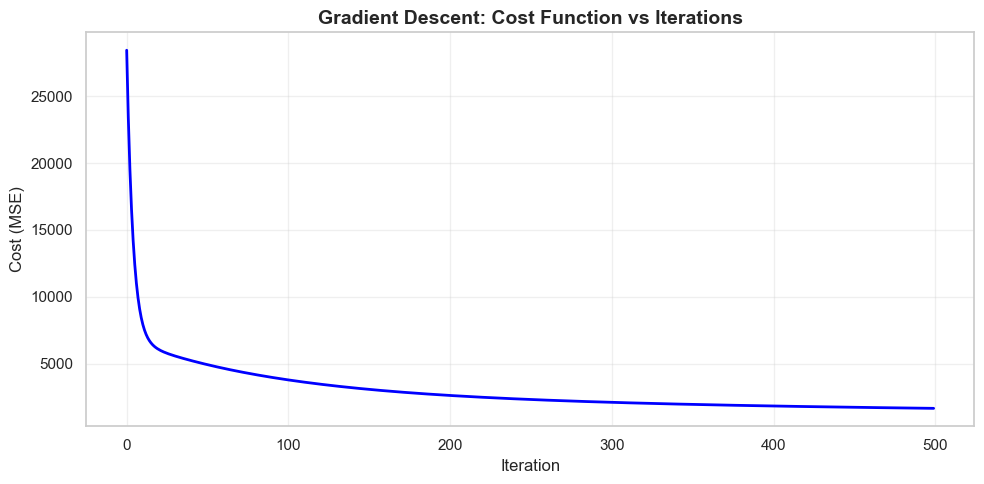


Cost decreased from 28424.514234 to 1674.661960
The curve shows the model is learning and converging!


In [15]:
# Visualize Gradient Descent Cost History
if target and len(feature_cols) > 0 and len(model_scratch_gd.cost_history) > 0:
    plt.figure(figsize=(10, 5))
    plt.plot(model_scratch_gd.cost_history, color='blue', linewidth=2)
    plt.title('Gradient Descent: Cost Function vs Iterations', fontsize=14, fontweight='bold')
    plt.xlabel('Iteration', fontsize=12)
    plt.ylabel('Cost (MSE)', fontsize=12)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    print(f"\nCost decreased from {model_scratch_gd.cost_history[0]:.6f} to {model_scratch_gd.cost_history[-1]:.6f}")
    print("The curve shows the model is learning and converging!")

In [16]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# SAMPLE DATA (small)
data = {
    'PM2.5':[80, 45, 110],
    'PM10':[120, 70, 160],
    'NO2':[55, 28, 70],
    'CO':[1.2, 0.8, 1.5],
    'AQI':[182, 92, 210]
}

df = pd.DataFrame(data)

# Binning
df['PM25_bin'] = pd.cut(df['PM2.5'], bins=[0,60,120], labels=['Low','High'])
df['PM10_bin'] = pd.cut(df['PM10'], bins=[0,100,200], labels=['Low','High'])
df['NO2_bin'] = pd.cut(df['NO2'], bins=[0,40,100], labels=['Low','High'])
df['AQI_bin'] = pd.cut(df['AQI'], bins=[0,100,200,300], labels=['Good','Moderate','Poor'])

# One-hot encoding
df_encoded = pd.get_dummies(df[['PM25_bin','PM10_bin','NO2_bin','AQI_bin']])

# Apriori Algorithm
frequent_items = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Association Rules
rules = association_rules(frequent_items, metric="confidence", min_threshold=0.5)

print("Frequent Itemsets:")
print(frequent_items)

print("\nAssociation Rules:")
print(rules[['antecedents','consequents','support','confidence','lift']])


Frequent Itemsets:
     support                                           itemsets
0   0.333333                                     (PM25_bin_Low)
1   0.666667                                    (PM25_bin_High)
2   0.333333                                     (PM10_bin_Low)
3   0.666667                                    (PM10_bin_High)
4   0.333333                                      (NO2_bin_Low)
5   0.666667                                     (NO2_bin_High)
6   0.333333                                     (AQI_bin_Good)
7   0.333333                                 (AQI_bin_Moderate)
8   0.333333                                     (AQI_bin_Poor)
9   0.333333                       (PM25_bin_Low, PM10_bin_Low)
10  0.333333                        (NO2_bin_Low, PM25_bin_Low)
11  0.333333                       (AQI_bin_Good, PM25_bin_Low)
12  0.666667                     (PM10_bin_High, PM25_bin_High)
13  0.666667                      (NO2_bin_High, PM25_bin_High)
14  0.333333         

Accuracy: 0.0

Classification Report:
              precision    recall  f1-score   support

    Moderate       0.00      0.00      0.00       1.0
        Poor       0.00      0.00      0.00       0.0

    accuracy                           0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



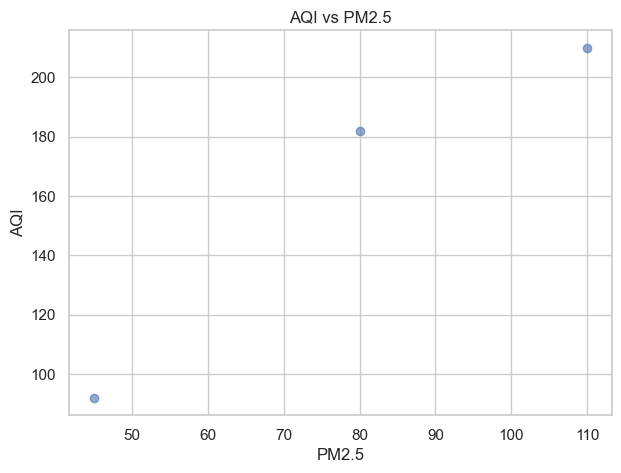

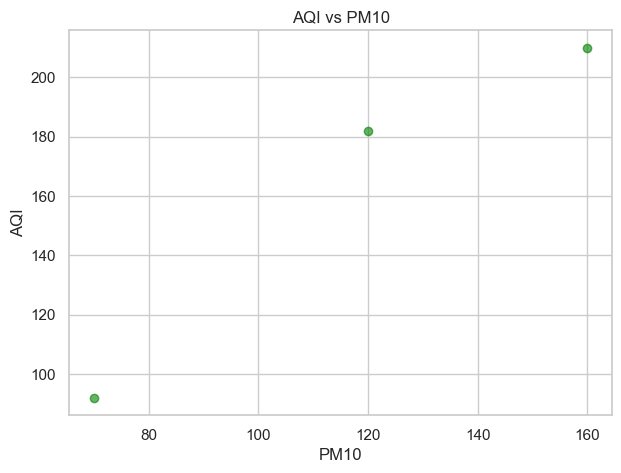

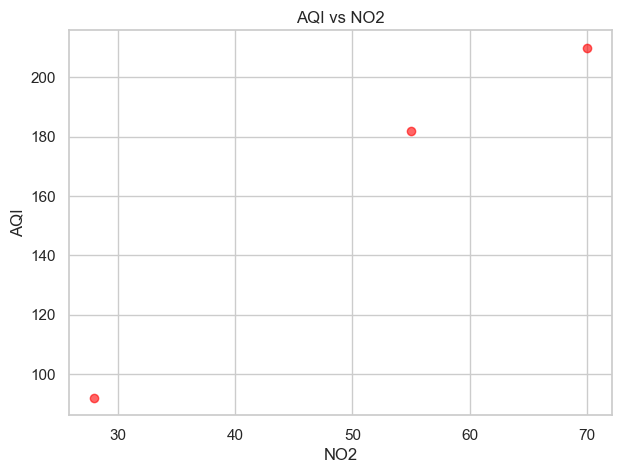

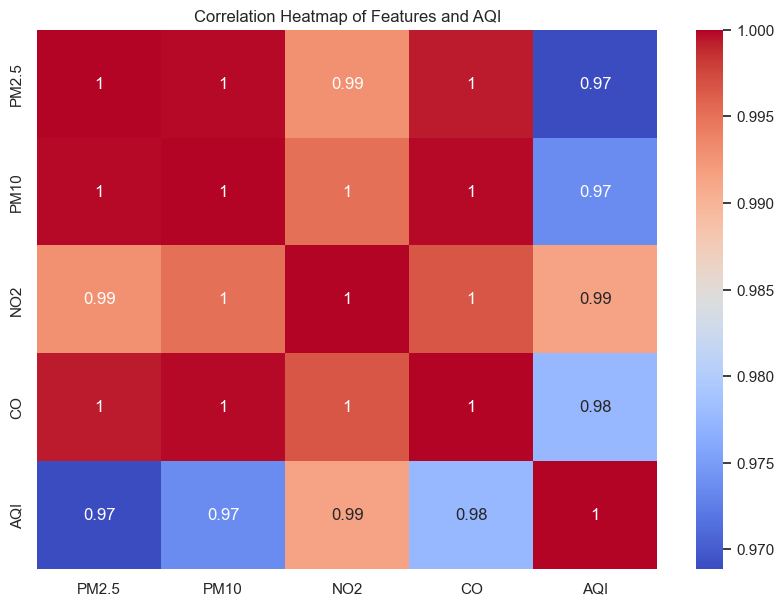

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings("ignore")

# CHECK AQI COLUMN

if "AQI" not in df.columns:
    raise ValueError(" ERROR: 'AQI' column not found in dataset!")

df = df.dropna(subset=["AQI"])

# AQI CATEGORY FUNCTION

def categorize(aqi):
    if aqi <= 100:
        return "Good"
    elif aqi <= 200:
        return "Moderate"
    else:
        return "Poor"

df['AQI_Category'] = df['AQI'].apply(categorize)

# SELECT FEATURES SAFELY
features = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3']
available_features = [col for col in features if col in df.columns]

X = df[available_features]
y = df['AQI_Category']

X = X.fillna(X.mean()) 

# TRAIN–TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# CART MODEL
model = DecisionTreeClassifier(criterion='gini', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# MODEL EVALUATION
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# VISUALIZATIONS

# 1) AQI vs PM2.5
plt.figure(figsize=(7,5))
plt.scatter(df['PM2.5'], df['AQI'], alpha=0.6)
plt.title("AQI vs PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

# 2) AQI vs PM10
plt.figure(figsize=(7,5))
plt.scatter(df['PM10'], df['AQI'], alpha=0.6, color='green')
plt.title("AQI vs PM10")
plt.xlabel("PM10")
plt.ylabel("AQI")
plt.grid(True)
plt.show()

# 3) AQI vs NO2
if 'NO2' in df.columns:
    plt.figure(figsize=(7,5))
    plt.scatter(df['NO2'], df['AQI'], alpha=0.6, color='red')
    plt.title("AQI vs NO2")
    plt.xlabel("NO2")
    plt.ylabel("AQI")
    plt.grid(True)
    plt.show()

# 4) Correlation Heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df[available_features + ['AQI']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Features and AQI")
plt.show()


## Step 10: Hypothesis Testing

Performing statistical hypothesis tests to validate research questions about air quality data.

In [18]:
# Hypothesis Test 1: One-Sample t-test
# Test if mean PM2.5 exceeds WHO safe limit (15 μg/m³ for normalized data ~0.25)

from scipy import stats

# Reload original data for hypothesis testing (before normalization)
df_original = pd.read_csv(r"C:\Users\LOQ 15IRX9\Downloads\city_day.csv")
df_original = df_original.dropna()

print("=" * 60)
print("HYPOTHESIS TEST 1: One-Sample t-test for PM2.5")
print("=" * 60)

if 'PM2.5' in df_original.columns:
    pm25_data = df_original['PM2.5'].dropna()
    
    # WHO safe limit for PM2.5 is 15 μg/m³ (annual average)
    safe_limit = 15
    
    # Hypotheses:
    print("\nNull Hypothesis (H0): Mean PM2.5 ≤ 15 μg/m³ (safe)")
    print("Alternative Hypothesis (H1): Mean PM2.5 > 15 μg/m³ (unsafe)")
    print(f"\nSignificance Level: α = 0.05")
    
    # Perform one-sample t-test (one-tailed)
    t_statistic, p_value = stats.ttest_1samp(pm25_data, safe_limit, alternative='greater')
    
    print(f"\nSample mean PM2.5: {pm25_data.mean():.2f} μg/m³")
    print(f"Sample size: {len(pm25_data)}")
    print(f"t-statistic: {t_statistic:.4f}")
    print(f"p-value: {p_value:.4f}")
    
    # Decision
    if p_value < 0.05:
        print(f"\n✓ REJECT H0 (p < 0.05)")
        print("Conclusion: PM2.5 levels are significantly higher than WHO safe limit.")
    else:
        print(f"\n✗ FAIL TO REJECT H0 (p ≥ 0.05)")
        print("Conclusion: No significant evidence that PM2.5 exceeds safe limit.")
else:
    print("PM2.5 column not found in dataset")

HYPOTHESIS TEST 1: One-Sample t-test for PM2.5

Null Hypothesis (H0): Mean PM2.5 ≤ 15 μg/m³ (safe)
Alternative Hypothesis (H1): Mean PM2.5 > 15 μg/m³ (unsafe)

Significance Level: α = 0.05

Sample mean PM2.5: 61.33 μg/m³
Sample size: 6236
t-statistic: 68.1143
p-value: 0.0000

✓ REJECT H0 (p < 0.05)
Conclusion: PM2.5 levels are significantly higher than WHO safe limit.


In [19]:
# Hypothesis Test 2: Independent Two-Sample t-test
# Compare PM2.5 levels between two cities or AQI categories

print("=" * 60)
print("HYPOTHESIS TEST 2: Independent Two-Sample t-test")
print("=" * 60)

# Test if AQI_Bucket exists to compare Good vs Poor air quality
if 'AQI_Bucket' in df_original.columns and 'PM2.5' in df_original.columns:
    # Compare Good vs Poor air quality buckets
    good_air = df_original[df_original['AQI_Bucket'] == 'Good']['PM2.5'].dropna()
    poor_air = df_original[df_original['AQI_Bucket'] == 'Poor']['PM2.5'].dropna()
    
    if len(good_air) > 0 and len(poor_air) > 0:
        print("\nComparing PM2.5 levels: Good Air Quality vs Poor Air Quality")
        print("\nNull Hypothesis (H0): Mean PM2.5 (Good) = Mean PM2.5 (Poor)")
        print("Alternative Hypothesis (H1): Mean PM2.5 (Good) ≠ Mean PM2.5 (Poor)")
        print(f"Significance Level: α = 0.05")
        
        # Perform independent t-test
        t_stat, p_val = stats.ttest_ind(good_air, poor_air)
        
        print(f"\nGood Air - Mean PM2.5: {good_air.mean():.2f} μg/m³ (n={len(good_air)})")
        print(f"Poor Air - Mean PM2.5: {poor_air.mean():.2f} μg/m³ (n={len(poor_air)})")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_val:.4f}")
        
        if p_val < 0.05:
            print(f"\n✓ REJECT H0 (p < 0.05)")
            print("Conclusion: Significant difference in PM2.5 between Good and Poor air quality.")
        else:
            print(f"\n✗ FAIL TO REJECT H0 (p ≥ 0.05)")
            print("Conclusion: No significant difference detected.")
    else:
        print("\nInsufficient data in Good or Poor categories")
        
elif 'City' in df_original.columns and 'PM2.5' in df_original.columns:
    # Compare two cities
    cities = df_original['City'].value_counts().head(2).index.tolist()
    if len(cities) >= 2:
        city1_data = df_original[df_original['City'] == cities[0]]['PM2.5'].dropna()
        city2_data = df_original[df_original['City'] == cities[1]]['PM2.5'].dropna()
        
        print(f"\nComparing PM2.5 levels: {cities[0]} vs {cities[1]}")
        print(f"\nNull Hypothesis (H0): Mean PM2.5 ({cities[0]}) = Mean PM2.5 ({cities[1]})")
        print(f"Alternative Hypothesis (H1): Mean PM2.5 ({cities[0]}) ≠ Mean PM2.5 ({cities[1]})")
        print(f"Significance Level: α = 0.05")
        
        t_stat, p_val = stats.ttest_ind(city1_data, city2_data)
        
        print(f"\n{cities[0]} - Mean PM2.5: {city1_data.mean():.2f} μg/m³ (n={len(city1_data)})")
        print(f"{cities[1]} - Mean PM2.5: {city2_data.mean():.2f} μg/m³ (n={len(city2_data)})")
        print(f"t-statistic: {t_stat:.4f}")
        print(f"p-value: {p_val:.4f}")
        
        if p_val < 0.05:
            print(f"\n✓ REJECT H0 (p < 0.05)")
            print(f"Conclusion: Significant difference in PM2.5 between {cities[0]} and {cities[1]}.")
        else:
            print(f"\n✗ FAIL TO REJECT H0 (p ≥ 0.05)")
            print("Conclusion: No significant difference detected.")
else:
    print("\nInsufficient categorical data for comparison")

HYPOTHESIS TEST 2: Independent Two-Sample t-test

Comparing PM2.5 levels: Good Air Quality vs Poor Air Quality

Null Hypothesis (H0): Mean PM2.5 (Good) = Mean PM2.5 (Poor)
Alternative Hypothesis (H1): Mean PM2.5 (Good) ≠ Mean PM2.5 (Poor)
Significance Level: α = 0.05

Good Air - Mean PM2.5: 14.57 μg/m³ (n=454)
Poor Air - Mean PM2.5: 101.79 μg/m³ (n=648)
t-statistic: -77.6498
p-value: 0.0000

✓ REJECT H0 (p < 0.05)
Conclusion: Significant difference in PM2.5 between Good and Poor air quality.


In [20]:
# Hypothesis Test 3: z-test for Proportions
# Test if proportion of days with "Poor" AQI exceeds a threshold
# Manual calculation without statsmodels

import numpy as np

print("=" * 60)
print("HYPOTHESIS TEST 3: z-test for Proportions (Manual Calculation)")
print("=" * 60)

if 'AQI_Bucket' in df_original.columns:
    # Calculate proportion of "Poor" air quality days
    total_days = len(df_original)
    poor_days = len(df_original[df_original['AQI_Bucket'] == 'Poor'])
    proportion = poor_days / total_days
    
    # Test if proportion exceeds 20% (0.20)
    threshold = 0.20
    
    print("\nNull Hypothesis (H0): Proportion of Poor AQI days ≤ 20%")
    print("Alternative Hypothesis (H1): Proportion of Poor AQI days > 20%")
    print(f"Significance Level: α = 0.05")
    
    print(f"\nObserved proportion (p̂): {proportion:.4f} ({proportion*100:.2f}%)")
    print(f"Sample size (n): {total_days}")
    print(f"Poor AQI days: {poor_days}")
    print(f"Hypothesized proportion (p₀): {threshold}")
    
    # Manual z-test calculation
    # Formula: z = (p̂ - p₀) / sqrt(p₀(1-p₀)/n)
    p_hat = proportion  # observed proportion
    p_0 = threshold     # hypothesized proportion
    n = total_days      # sample size
    
    # Calculate standard error
    standard_error = np.sqrt((p_0 * (1 - p_0)) / n)
    
    # Calculate z-statistic
    z_stat = (p_hat - p_0) / standard_error
    
    # Calculate p-value for one-tailed test (right-tailed)
    # Using the standard normal distribution
    # P(Z > z) = 1 - Φ(z) where Φ is the CDF
    from scipy.stats import norm
    p_val = 1 - norm.cdf(z_stat)
    
    print(f"\nManual Calculations:")
    print(f"Standard Error (SE): {standard_error:.6f}")
    print(f"z-statistic: z = (p̂ - p₀) / SE = ({p_hat:.4f} - {p_0:.4f}) / {standard_error:.6f} = {z_stat:.4f}")
    print(f"p-value: {p_val:.4f}")
    
    # Critical value for α = 0.05 (one-tailed)
    critical_z = 1.645
    print(f"Critical z-value (α=0.05, one-tailed): {critical_z}")
    
    # Decision
    if p_val < 0.05:
        print(f"\n✓ REJECT H0 (p-value {p_val:.4f} < 0.05)")
        print(f"   Also: z-statistic {z_stat:.4f} > critical value {critical_z}")
        print(f"Conclusion: Proportion of Poor AQI days significantly exceeds {threshold*100}%.")
    else:
        print(f"\n✗ FAIL TO REJECT H0 (p-value {p_val:.4f} ≥ 0.05)")
        print(f"   Also: z-statistic {z_stat:.4f} ≤ critical value {critical_z}")
        print(f"Conclusion: No significant evidence that Poor AQI proportion exceeds {threshold*100}%.")
    
elif 'AQI' in df_original.columns:
    # Create categories if AQI_Bucket doesn't exist
    def categorize_aqi(aqi):
        if aqi <= 100:
            return "Good"
        elif aqi <= 200:
            return "Moderate"
        else:
            return "Poor"
    
    df_original['AQI_Category'] = df_original['AQI'].apply(categorize_aqi)
    
    total_days = len(df_original)
    poor_days = len(df_original[df_original['AQI_Category'] == 'Poor'])
    proportion = poor_days / total_days
    
    threshold = 0.20
    
    print("\nNull Hypothesis (H0): Proportion of Poor AQI days ≤ 20%")
    print("Alternative Hypothesis (H1): Proportion of Poor AQI days > 20%")
    print(f"Significance Level: α = 0.05")
    
    print(f"\nObserved proportion (p̂): {proportion:.4f} ({proportion*100:.2f}%)")
    print(f"Sample size (n): {total_days}")
    print(f"Poor AQI days: {poor_days}")
    print(f"Hypothesized proportion (p₀): {threshold}")
    
    # Manual z-test calculation
    p_hat = proportion
    p_0 = threshold
    n = total_days
    
    standard_error = np.sqrt((p_0 * (1 - p_0)) / n)
    z_stat = (p_hat - p_0) / standard_error
    
    from scipy.stats import norm
    p_val = 1 - norm.cdf(z_stat)
    
    print(f"\nManual Calculations:")
    print(f"Standard Error (SE): {standard_error:.6f}")
    print(f"z-statistic: z = (p̂ - p₀) / SE = ({p_hat:.4f} - {p_0:.4f}) / {standard_error:.6f} = {z_stat:.4f}")
    print(f"p-value: {p_val:.4f}")
    
    critical_z = 1.645
    print(f"Critical z-value (α=0.05, one-tailed): {critical_z}")
    
    if p_val < 0.05:
        print(f"\n✓ REJECT H0 (p-value {p_val:.4f} < 0.05)")
        print(f"   Also: z-statistic {z_stat:.4f} > critical value {critical_z}")
        print(f"Conclusion: Proportion of Poor AQI days significantly exceeds {threshold*100}%.")
    else:
        print(f"\n✗ FAIL TO REJECT H0 (p-value {p_val:.4f} ≥ 0.05)")
        print(f"   Also: z-statistic {z_stat:.4f} ≤ critical value {critical_z}")
        print(f"Conclusion: No significant evidence that Poor AQI proportion exceeds {threshold*100}%.")
else:
    print("\nAQI data not available for proportion test")

HYPOTHESIS TEST 3: z-test for Proportions (Manual Calculation)

Null Hypothesis (H0): Proportion of Poor AQI days ≤ 20%
Alternative Hypothesis (H1): Proportion of Poor AQI days > 20%
Significance Level: α = 0.05

Observed proportion (p̂): 0.1039 (10.39%)
Sample size (n): 6236
Poor AQI days: 648
Hypothesized proportion (p₀): 0.2

Manual Calculations:
Standard Error (SE): 0.005065
z-statistic: z = (p̂ - p₀) / SE = (0.1039 - 0.2000) / 0.005065 = -18.9696
p-value: 1.0000
Critical z-value (α=0.05, one-tailed): 1.645

✗ FAIL TO REJECT H0 (p-value 1.0000 ≥ 0.05)
   Also: z-statistic -18.9696 ≤ critical value 1.645
Conclusion: No significant evidence that Poor AQI proportion exceeds 20.0%.


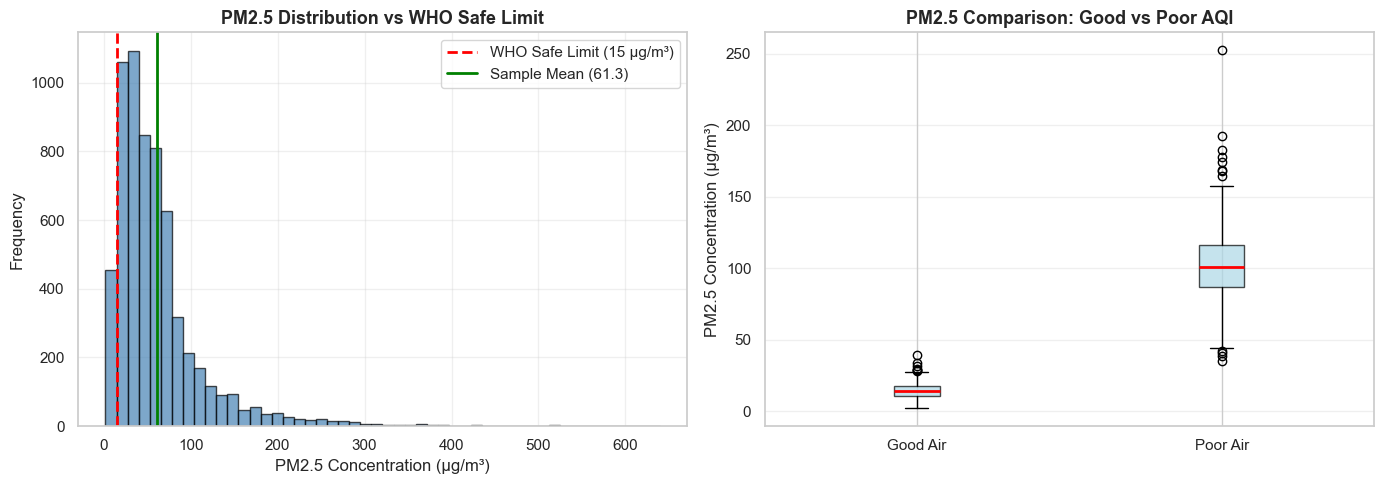


HYPOTHESIS TESTING SUMMARY COMPLETE


In [21]:
# Visualize Hypothesis Test Results

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Visualization 1: PM2.5 Distribution with Safe Limit
if 'PM2.5' in df_original.columns:
    pm25_data = df_original['PM2.5'].dropna()
    
    axes[0].hist(pm25_data, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
    axes[0].axvline(x=15, color='red', linestyle='--', linewidth=2, label='WHO Safe Limit (15 μg/m³)')
    axes[0].axvline(x=pm25_data.mean(), color='green', linestyle='-', linewidth=2, label=f'Sample Mean ({pm25_data.mean():.1f})')
    axes[0].set_xlabel('PM2.5 Concentration (μg/m³)', fontsize=12)
    axes[0].set_ylabel('Frequency', fontsize=12)
    axes[0].set_title('PM2.5 Distribution vs WHO Safe Limit', fontsize=13, fontweight='bold')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

# Visualization 2: Comparison of Groups (if available)
if 'AQI_Bucket' in df_original.columns and 'PM2.5' in df_original.columns:
    good_air = df_original[df_original['AQI_Bucket'] == 'Good']['PM2.5'].dropna()
    poor_air = df_original[df_original['AQI_Bucket'] == 'Poor']['PM2.5'].dropna()
    
    if len(good_air) > 0 and len(poor_air) > 0:
        axes[1].boxplot([good_air, poor_air], labels=['Good Air', 'Poor Air'], patch_artist=True,
                       boxprops=dict(facecolor='lightblue', alpha=0.7),
                       medianprops=dict(color='red', linewidth=2))
        axes[1].set_ylabel('PM2.5 Concentration (μg/m³)', fontsize=12)
        axes[1].set_title('PM2.5 Comparison: Good vs Poor AQI', fontsize=13, fontweight='bold')
        axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n" + "=" * 60)
print("HYPOTHESIS TESTING SUMMARY COMPLETE")
print("=" * 60)